In [53]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
file_path = r'C:\my-drive\git-repos\my-learning\my_ml_learning\data\house_price_pred\train.csv'

In [7]:
dataset = pd.read_csv(file_path)
dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# Handle Missing Values

## In Categorical Data

In [9]:
cat_features  = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
len(cat_features)

43

In [10]:
dataset[cat_features].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [11]:
dataset[cat_features].head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
data_bkup = dataset.copy()

In [13]:
dataset[cat_features] = dataset[cat_features].fillna('Missing')

In [14]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [15]:
dataset[cat_features].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Missing value in numeric variable

In [22]:
num_features_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1 and dataset[feature].dtypes != 'O']
len(num_features_na)

3

In [23]:
dataset[num_features_na].isnull().sum()


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [24]:
for feature in num_features_na:
    median_value = dataset[feature].median()
    
    dataset[feature+'_nan'] = np.where(dataset[feature].isnull(), 1, 0)
    dataset[feature].fillna(median_value, inplace=True)
    
dataset[num_features_na].isnull().sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [25]:
dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0


# Handling Temporal variables

In [27]:
year_features = [feature for feature in dataset.columns if 'yr' in feature.lower() or 'year' in feature.lower()]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_nan']

In [29]:
for feature in year_features[:3]:
    dataset[feature] = dataset.YrSold - dataset[feature]
    
dataset[year_features].head(2)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,GarageYrBlt_nan
0,5,5,5.0,2008,0
1,31,31,31.0,2007,0


# Handling Contineous variables

In [34]:
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

<IPython.core.display.Javascript object>

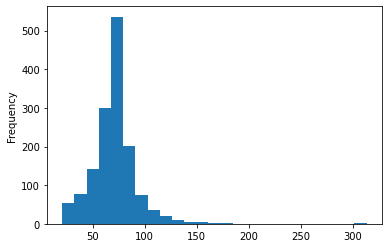

<IPython.core.display.Javascript object>

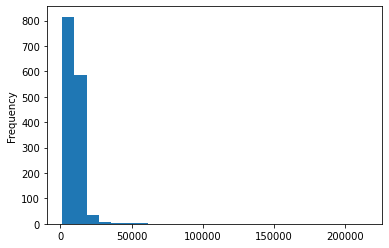

<IPython.core.display.Javascript object>

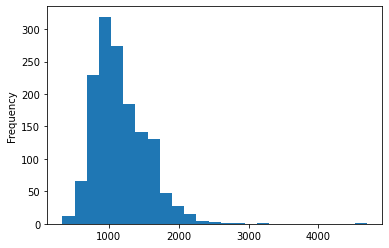

<IPython.core.display.Javascript object>

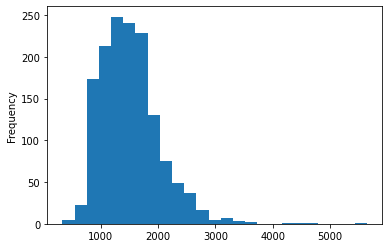

<IPython.core.display.Javascript object>

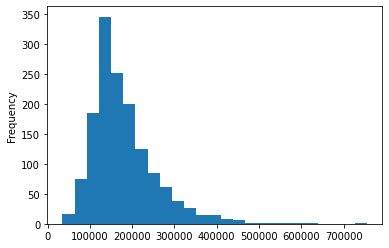

In [35]:
for ftr in num_features:
    dataset[ftr].plot.hist(bins=25)
    plt.show()

In [37]:
for feature in num_features:
    dataset[feature] = np.log(dataset[feature])

dataset[num_features].head(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
0,4.174387,9.041922,6.752270,7.444249,12.247694
1,4.382027,9.169518,7.140453,7.140453,12.109011


# Handling Categorical features

In [39]:
len(cat_features)

43

In [40]:
dataset[cat_features].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [41]:
dataset[cat_features].head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [43]:
len(dataset)

1460

In [44]:
10/1460

0.00684931506849315

In [42]:
for feature in cat_features:
    print(dataset.groupby(feature)['SalePrice'].count())

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64
Street
Grvl       6
Pave    1454
Name: SalePrice, dtype: int64
Alley
Grvl         50
Missing    1369
Pave         41
Name: SalePrice, dtype: int64
LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: SalePrice, dtype: int64
LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: SalePrice, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: SalePrice, dtype: int64
LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: SalePrice, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: SalePrice, dtype: int64
Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       

In [48]:
d1 = dataset.copy()

In [50]:
oe = OrdinalEncoder()
d1[cat_features] = oe.fit_transform(dataset[cat_features])

In [52]:
dataset[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [51]:
d1[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0
1,3.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,...,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0
2,3.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0
3,3.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,...,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,0.0
4,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0


# Feature Scaling

<AxesSubplot:ylabel='Frequency'>

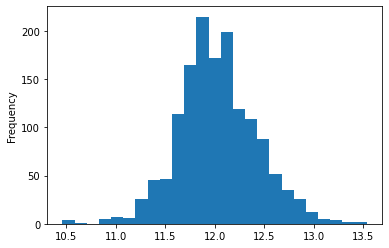

In [54]:
dataset.SalePrice.plot.hist(bins=25)

In [55]:
d1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
len(d1.columns)

84

In [56]:
scale_feature = [feature for feature in d1.columns if feature.lower() not in ['id', 'saleprice']]
len(scale_feature)

82

In [58]:
scale_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [60]:
pd.pandas.set_option('display.max_columns', None)

In [61]:
d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3.0,4.174387,9.041922,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,5,5,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,706,6.0,0,150,856,1.0,0.0,1.0,5.0,6.752270,854,0,7.444249,1,0,2,1,3,1,2.0,8,6.0,0,3.0,1.0,5.0,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,2.0,1.0,0,2,2008,8.0,4.0,12.247694,0,0,0
1,2,20,3.0,4.382027,9.169518,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,31,31,1.0,1.0,8.0,8.0,3.0,0.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,978,6.0,0,284,1262,1.0,0.0,1.0,5.0,7.140453,0,0,7.140453,0,1,2,0,3,1,3.0,6,6.0,1,5.0,1.0,31.0,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,3.0,2.0,1.0,0,5,2007,8.0,4.0,12.109011,0,0,0
2,3,60,3.0,4.219508,9.328123,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,7,6,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,486,6.0,0,434,920,1.0,0.0,1.0,5.0,6.824374,866,0,7.487734,1,0,2,1,3,1,2.0,6,6.0,1,5.0,1.0,7.0,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,3.0,2.0,1.0,0,9,2008,8.0,4.0,12.317167,0,0,0
3,4,70,3.0,4.094345,9.164296,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,91,36,1.0,1.0,13.0,15.0,3.0,0.0,3.0,4.0,0.0,4.0,1.0,4.0,0.0,216,6.0,0,540,756,1.0,2.0,1.0,5.0,6.867974,756,0,7.448334,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,8.0,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,3.0,2.0,1.0,0,2,2006,8.0,0.0,11.849398,0,0,0
4,5,60,3.0,4.430817,9.565214,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,8,8,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,655,6.0,0,490,1145,1.0,0.0,1.0,5.0,7.043160,1053,0,7.695303,1,0,2,1,4,1,2.0,9,6.0,1,5.0,1.0,8.0,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,3.0,2.0,1.0,0,12,2008,8.0,4.0,12.429216,0,0,0


In [62]:
scaler = MinMaxScaler()
d1[scale_feature] = scaler.fit_transform(d1[scale_feature])
d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,0.235294,0.75,0.418208,0.366344,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.036765,0.098361,0.2,0.142857,0.857143,0.866667,0.25,0.12250,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.166667,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,0.5,0.25,0.0,0.090909,0.50,1.0,0.8,12.247694,0.0,0.0,0.0
1,2,0.000000,0.75,0.495064,0.391317,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.227941,0.524590,0.2,0.142857,0.571429,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.166667,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,0.5,0.25,0.0,0.363636,0.25,1.0,0.8,12.109011,0.0,0.0,0.0
2,3,0.235294,0.75,0.434909,0.422359,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.051471,0.114754,0.2,0.142857,0.857143,0.866667,0.25,0.10125,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.166667,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,0.5,0.25,0.0,0.727273,0.50,1.0,0.8,12.317167,0.0,0.0,0.0
3,4,0.294118,0.75,0.388581,0.390295,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.669118,0.606557,0.2,0.142857,0.928571,1.000000,0.75,0.00000,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.833333,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,0.5,0.25,0.0,0.090909,0.00,1.0,0.0,11.849398,0.0,0.0,0.0
4,5,0.235294,0.75,0.513123,0.468761,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.058824,0.147541,0.2,0.142857,0.857143,0.866667,0.25,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.166667,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,0.5,0.25,0.0,1.000000,0.50,1.0,0.8,12.429216,0.0,0.0,0.0


In [63]:
d1[cat_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.75,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,1.000000,0.2,0.0,1.0,1.0,0.666667,1.000000,0.6,0.166667,0.666667,1.0,1.0,1.0,1.0,0.50,0.25,1.0,0.8
1,0.75,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.2,0.142857,0.571429,0.533333,0.75,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,1.000000,0.2,0.0,1.0,1.0,1.000000,1.000000,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.50,0.25,1.0,0.8
2,0.75,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,1.000000,0.2,0.0,1.0,1.0,0.666667,1.000000,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.50,0.25,1.0,0.8
3,0.75,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.928571,1.000000,0.75,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,1.000000,0.2,0.5,1.0,1.0,0.666667,1.000000,0.4,0.833333,1.000000,1.0,1.0,1.0,1.0,0.50,0.25,1.0,0.0
4,0.75,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,1.000000,0.2,0.0,1.0,1.0,0.666667,1.000000,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.50,0.25,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.75,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.75,1.000000,1.0,0.4,0.5,1.00,1.00,1.000000,1.000000,0.2,0.0,1.0,1.0,1.000000,1.000000,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.50,0.25,1.0,0.8
1456,0.75,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.583333,0.250,0.285714,0.0,0.285714,0.2,0.142857,0.642857,0.666667,1.00,1.000000,1.0,0.2,0.5,1.00,1.00,0.000000,0.833333,0.2,1.0,1.0,1.0,1.000000,0.333333,1.0,0.166667,1.000000,1.0,1.0,1.0,1.0,0.75,0.25,1.0,0.8
1457,0.75,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.357143,0.333333,0.75,0.000000,0.5,0.8,1.0,0.25,1.00,0.333333,1.000000,0.2,0.0,1.0,1.0,0.666667,1.000000,0.4,0.166667,0.666667,1.0,1.0,1.0,1.0,0.00,0.75,1.0,0.8
1458,0.75,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.500000,0.250,0.285714,0.0,0.285714,0.6,0.142857,0.571429,0.533333,0.75,1.000000,1.0,0.2,1.0,1.00,0.75,0.333333,0.833333,0.2,0.5,1.0,0.0,0.666667,1.000000,0.6,0.166667,1.000000,1.0,1.0,1.0,1.0,0.50,0.25,1.0,0.8


In [64]:
d1['MSZoning'].unique()

array([0.75, 1.  , 0.  , 0.25, 0.5 ])